3.1 Problem 1

In [1]:
import pandas as pd


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of A.I./Copy of bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [8]:
for col in object_columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']


In [9]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [10]:
numeric = df.select_dtypes(exclude='object')
numeric.to_csv("banknumericdata.csv", index=False)
numeric.head()


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [11]:
num_df = pd.read_csv("banknumericdata.csv")
num_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of A.I./Copy of medical_students_dataset.csv")
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [15]:
df.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


In [16]:
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [17]:
df.isnull().sum()


,0
Student ID,0
Age,0
Gender,0
Height,0
Weight,0
Blood Type,0
BMI,0
Temperature,0
Heart Rate,0
Blood Pressure,0


In [18]:
df.duplicated().sum()


np.int64(12879)

In [19]:
df = df.drop_duplicates()


In [20]:
df.duplicated().sum()


np.int64(0)

3.2

Problem 1

In [ ]:
import pandas as pd

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of A.I./Copy of Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
subset.head()

,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0


In [23]:
first_class = subset[subset['Pclass'] == 1]
first_class.head()


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [24]:
fare_stats = first_class['Fare'].agg(['mean', 'median', 'max', 'min'])
fare_stats


,Fare
mean,84.154687
median,60.287500
max,512.329200
min,0.000000


Problem 2

In [25]:
first_class['Age'].isnull().sum()


np.int64(30)

In [26]:
first_class = first_class.dropna(subset=['Age'])


In [27]:
first_class['Age'].isnull().sum()


np.int64(0)

Problem 3

In [29]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

In [30]:
df = pd.concat([df, embarked_dummies], axis=1)

In [31]:
df.drop('Embarked', axis=1, inplace=True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem 4

In [33]:
import pandas as pd
gender_survival = df.groupby('Sex')['Survived'].mean()
gender_survival

,Survived
Sex,
female,0.742038
male,0.188908


In [34]:
print("Mean Survival Rate by Gender:")
print(gender_survival)

Mean Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


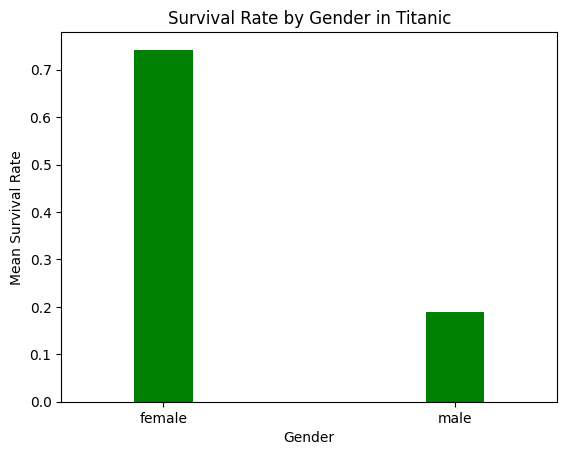

In [35]:
import matplotlib.pyplot as plt
gender_survival.plot(kind='bar',
                     color='green',
                     width=0.2)

plt.title("Survival Rate by Gender in Titanic")
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.xticks(rotation=0)
plt.show()



Problem 5

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of A.I./Copy of Titanic-Dataset.csv")

In [38]:
df_clean = df.dropna(subset=['Embarked'])

In [39]:
grouped = df_clean.groupby(['Embarked', 'Sex'])['Survived'].mean()
grouped

Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64

In [40]:
grouped_unstack = grouped.unstack()
grouped_unstack

Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.689655,0.174603


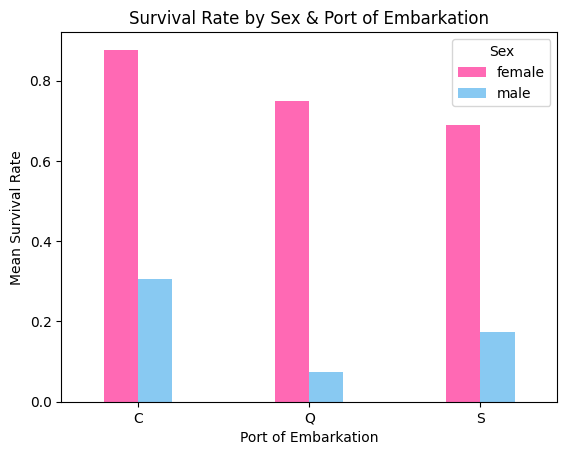

In [41]:
grouped_unstack.plot(kind='bar', width=0.4, color=['#ff69b4', '#88c9f2'])

plt.title("Survival Rate by Sex & Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.show()
